In [86]:
import pandas as pd
import numpy as np

In [87]:
train_data= pd.read_csv("Train_data_liv_tox_18636.csv")
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_1020.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_255.csv")

In [88]:
test_data_heldouttest

,smiles_r,TOXICITY,Source_rank,Source,Data,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,1,0,0,0,...,0.000000,9.254453,46.225974,211.120843,6.597526,394.0,18.0,70.0,76.0,3.361111
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,0,1,0,0,0,...,6.259581,9.880372,71.229945,396.002153,10.153901,1406.0,32.0,122.0,139.0,5.305556
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,0,0,0,0,...,7.247793,10.586155,73.338433,312.208930,6.121744,1053.0,49.0,134.0,171.0,5.006944
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,6.293419,10.252700,80.792385,435.227040,7.134870,3122.0,49.0,160.0,186.0,7.277778
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,7.247793,10.812331,77.185478,358.178024,6.888039,1425.0,59.0,154.0,198.0,5.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,0,1,0,0,0,...,0.000000,9.142597,42.354113,169.073893,7.351039,198.0,16.0,56.0,63.0,2.805556
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,0,0,0,0,0,...,7.095893,10.516373,80.485250,454.030014,10.558838,2468.0,41.0,156.0,186.0,6.277778
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,0.000000,9.692211,51.876911,259.168462,6.479212,726.0,27.0,92.0,105.0,4.472222
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,7.034388,10.364608,69.208114,272.177630,6.185855,724.0,39.0,118.0,148.0,4.152778


In [89]:
test_data_ncv

,smiles_r,TOXICITY,Source_rank,Source,Data,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CCN1CC(CCN2CCOCC2)C(c2ccccc2)(c2ccccc2)C1=O,0,1,DILIst Classification Intravenous,DILI,0,1,0,0,0,...,7.234898,10.420285,78.303267,378.230728,6.521219,1843.0,49.0,148.0,180.0,6.361111
1,COC1=CC(=O)CC(C)C12Oc1c(Cl)c(OC)cc(OC)c1C2=O,1,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,7.273093,10.513063,74.167012,352.071366,8.587106,1137.0,50.0,132.0,167.0,5.430556
2,NC1=NC(=O)C2C(=N1)NCC(CNc1ccc(C(=O)NC(CCC(=O)O...,0,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,0.000000,10.370142,70.101207,473.165896,8.301156,4127.0,54.0,172.0,199.0,7.583333
3,CC(=O)OCC[N+](C)(C)C,0,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,0.000000,8.448700,38.179718,146.117555,5.619906,139.0,7.0,42.0,40.0,2.208333
4,S=C=Nc1cccc2ccccc12,1,1,DILIst Classification,DILI,0,0,0,0,0,...,0.000000,9.382527,44.188427,185.029920,9.251496,236.0,18.0,64.0,74.0,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,CC(C)C(=O)Oc1ccc(CO)cc1C(CCN(C(C)C)C(C)C)c1ccccc1,0,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,0.000000,10.124349,65.144504,411.277344,6.138468,2376.0,46.0,146.0,167.0,6.833333
1016,C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1,0,1,DILIst Classification Oral,DILI,0,0,0,0,0,...,7.273093,10.175459,73.330687,318.206370,6.239341,1132.0,35.0,124.0,147.0,4.916667
1017,COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[nH]2)c1OC,1,1,DILIst Classification Oral,DILI,0,1,0,0,0,...,6.842683,10.115247,74.826663,383.075133,9.343296,1806.0,40.0,134.0,157.0,5.861111
1018,CCOC(=O)C1C(C)=NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl,1,1,DILIst Classification Oral,DILI,0,0,0,0,1,...,0.000000,10.236848,59.877932,383.069113,8.706116,1300.0,45.0,126.0,151.0,5.750000


In [102]:
mfp_features = train_data.columns[5:2053]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2054:2220]
physicochemical_features= train_data.columns[2220:2235]
mordred_features= train_data.columns[2235:]
identifiers = train_data.columns[:5]
liv_features = ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration",
                "2", "3",  "5", "6", "7", "8", "10", "11", "14", "15", "16"]

In [91]:
#Find similarity between each test compound and train set compounds MFP
#mean of the 5 highest tanimoto similarity of MFP keys, all, actives, inactives
#perc of compound with MFP TS>0.55, all, actives, inactives
from tqdm import tqdm
neighbours_limit = 3

def TanimotoSimilarity(ex1, ex2, attrs):
  """
    >>> v1 = [0,1,0,1]
    >>> v2 = [1,0,1,0]
    >>> TanimotoDist(v1,v2,range(4))
    1.0
    """
  inter = 0.0
  unin = 0.0
  for i in attrs:
    if (ex1[i] or ex2[i]):
      unin += 1
      if (ex1[i] and ex2[i]):
        inter += 1
  if (unin != 0.0):
    return (inter / unin)
  else:
    return 0

def BulkTanimoto(siv1, sivs):
    res = []
    for i in range(len(sivs)): 
        siv2 = sivs[i]
        simVal = TanimotoSimilarity(siv1, siv2, range(len(siv1)))
        res.append(simVal)
    return res


def findTSsimscore(assay, train, test): 
    
    smiles_r_list=[]
    ts_nearest_list =[]
    ts_nearest_actives_list=[]
    ts_nearest_inactives_list=[]
    perc_list=[]
    perc_actives_list=[]
    perc_inactives_list=[]
    
    for index, row in tqdm(test.iterrows()):

        smiles_r=row["smiles_r"]
        smiles_r_list.append(smiles_r)
        
        fps_test = row[mfp_features].to_numpy()
        fps_temp_train=[(x) for x in train[mfp_features].to_numpy()]

        ts_nearest = []
        ts_nearest = BulkTanimoto(fps_test ,fps_temp_train)

        #Add all values with Activity
        df_temp = pd.DataFrame([train[[assay]].values.flatten(), ts_nearest]).T
        df_temp.columns = ["TOXICITY", "TS_similarity"]
        
       
        #Calculate Ts 5nn
        ts_nearest_ovarall = df_temp.sort_values(by="TS_similarity", ascending=False)["TS_similarity"][:neighbours_limit].mean()
        ts_nearest_list.append(ts_nearest_ovarall)
    
    ts_nearest_list=np.array(ts_nearest_list)
    ts_nearest_list= ts_nearest_list.reshape(len(test))
    

    df_ts_nearest = pd.DataFrame({"smiles_r": smiles_r_list,
                                  "ts_nearest": ts_nearest_list})
    return df_ts_nearest

In [92]:
TS_similarity = findTSsimscore("TOXICITY", test_data_ncv, test_data_heldouttest)
TS_similarity

255it [01:09,  3.67it/s]


,smiles_r,ts_nearest
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0.603641
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0.536058
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0.752221
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,0.523816
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,0.894444
...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0.532229
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,0.639953
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0.277062
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,0.794686


In [93]:
TS_similarity.to_csv("TS_Similarity_255.csv", index=False)
TS_similarity

,smiles_r,ts_nearest
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0.603641
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0.536058
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0.752221
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,0.523816
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,0.894444
...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0.532229
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,0.639953
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0.277062
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,0.794686


In [103]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

93
100
346


In [104]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features) +list(liv_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 

In [105]:
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_1020_livpreds.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_255_livpreds.csv")

In [106]:
test_data_heldouttest = test_data_heldouttest[all_features]
test_data_ncv = test_data_ncv[all_features]

In [107]:
test_data_heldouttest

,smiles_r,TOXICITY,Source_rank,Source,Data,ABC,ABCGG,nAcid,nBase,nAromAtom,...,3,5,6,7,8,10,11,14,15,16
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,11.113111,10.148350,0.0,1.0,6.0,...,0.499094,0.220350,0.288708,0.542275,0.332715,0.294181,0.253750,0.026997,0.067801,0.104456
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,18.632065,15.271464,0.0,0.0,17.0,...,0.567809,0.641096,0.778160,0.855955,0.505657,0.479769,0.507222,0.891707,0.306721,0.170294
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,18.334980,14.848566,0.0,0.0,0.0,...,0.551261,0.096629,0.422820,0.430636,0.462722,0.542910,0.414408,0.297146,0.188203,0.155574
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,24.305499,20.006308,3.0,0.0,17.0,...,0.830028,0.145256,0.509965,0.764704,0.527018,0.774434,0.589813,0.968304,0.250082,0.064662
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,20.848529,17.255118,0.0,0.0,0.0,...,0.457768,0.067164,0.343394,0.271960,0.350366,0.479720,0.266352,0.689398,0.042730,0.060388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,8.732571,8.336098,0.0,1.0,6.0,...,0.232796,0.167329,0.308276,0.419450,0.340450,0.292893,0.395543,0.025085,0.025500,0.085091
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,22.891285,18.445302,3.0,0.0,10.0,...,0.893730,0.202307,0.302222,0.808419,0.790964,0.847622,0.647285,0.126679,0.041102,0.198911
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,14.170645,11.989242,0.0,1.0,10.0,...,0.576872,0.524835,0.492122,0.661294,0.469878,0.241885,0.503785,0.541935,0.058628,0.090357
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,16.356175,12.977056,0.0,0.0,6.0,...,0.412044,0.114721,0.517276,0.566964,0.407130,0.443519,0.296656,0.553984,0.306289,0.103064


In [108]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [109]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [110]:
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 'nBondsKD',
 'C1SP2',
 'C2SP2',
 'C3SP2',
 'C1SP3',
 'C2SP3',


In [111]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(1020, 567)
(255, 567)
1020
255


In [112]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold

from numpy import argmax

In [113]:
from sklearn.model_selection import KFold
import pickle

loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, max_depth=8, max_features=49,
                       min_samples_leaf=8, min_samples_split=9,
                       n_estimators=600, n_jobs=40, random_state=42)

Best Threshold=0.612911
[[ 61  30]
 [ 44 120]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        91
           1       0.80      0.73      0.76       164

    accuracy                           0.71       255
   macro avg       0.69      0.70      0.69       255
weighted avg       0.72      0.71      0.71       255

balanced_accuracy_score  0.7010184937014206
matthews_corrcoef  0.3913527150564241
0.6703296703296703
0.7317073170731707
roc_auc_score 0.7392120075046904


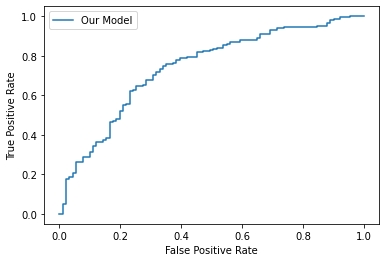

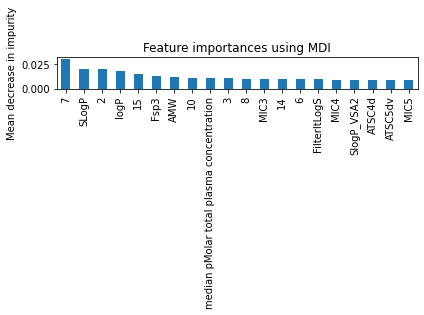

In [114]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

test_data_heldouttest["all_features_preds"] = y_pred
test_data_heldouttest["all_features_proba"] = y_proba

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

print(Sensitivity)
print(Specificity)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [115]:
df = pd.DataFrame()
df["fpr"]=best_model_fpr
df["tpr"]=best_model_tpr
#tpr is sensitivity
df["thresholds"]=np.round(_, 8)
df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.914594
1,0.010989,0.000000,0.914594
2,0.010989,0.048780,0.871272
3,0.021978,0.048780,0.868743
4,0.021978,0.164634,0.826664
...,...,...,...
100,0.923077,0.987805,0.291724
101,0.923077,0.993902,0.279184
102,0.956044,0.993902,0.265534
103,0.956044,1.000000,0.264297


In [116]:
df_analyse = test_data_heldouttest[["smiles_r","TOXICITY","Source_rank","Source","Data", "all_features_preds", "all_features_proba"]]
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,0.381605
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,0,0.438883
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,1,0.914594
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,1,0.810263
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,1,0.779076
...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,0,0.363069
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,1,0.826664
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,0,0.585705
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,1,0.875133


In [117]:
P=[]
N=[]
TP=[]
FP=[]
TN=[]
FN=[]

for threshold in df["thresholds"].to_list():

    P.append(len(df_analyse[df_analyse["all_features_proba"]>=threshold]))
    N.append(len(df_analyse[df_analyse["all_features_proba"]<threshold]))
    
    df_analyse_P = df_analyse[df_analyse["TOXICITY"]==1]
    TP.append(len(df_analyse_P[df_analyse_P["all_features_proba"]>=threshold]))
    FN.append(len(df_analyse_P[df_analyse_P["all_features_proba"]<threshold]))
    
    df_analyse_N = df_analyse[df_analyse["TOXICITY"]==0]
    FP.append(len(df_analyse_N[df_analyse_N["all_features_proba"]>=threshold]))
    TN.append(len(df_analyse_N[df_analyse_N["all_features_proba"]<threshold]))
                       
df["predP"] = P
df["predN"]= N
df["TP"] = TP
df["TN"]= TN
df["FP"] = FP
df["FN"]= FN

df_all_features_tpr_fpr = df
df_all_features_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN
0,0.000000,0.000000,1.914594,0,255,0,91,0,164
1,0.010989,0.000000,0.914594,0,255,0,91,0,164
2,0.010989,0.048780,0.871272,9,246,8,90,1,156
3,0.021978,0.048780,0.868743,9,246,8,90,1,156
4,0.021978,0.164634,0.826664,28,227,26,89,2,138
...,...,...,...,...,...,...,...,...,...
100,0.923077,0.987805,0.291724,245,10,162,8,83,2
101,0.923077,0.993902,0.279184,247,8,163,7,84,1
102,0.956044,0.993902,0.265534,250,5,163,4,87,1
103,0.956044,1.000000,0.264297,250,5,163,4,87,1


In [118]:
df_all_features_tpr_fpr["PPV"] = df_all_features_tpr_fpr["TP"]/df_all_features_tpr_fpr["predP"]
df_all_features_tpr_fpr["LR+"] = ((df_all_features_tpr_fpr["TP"])/(df_all_features_tpr_fpr["TP"]+df_all_features_tpr_fpr["FN"]))/((df_all_features_tpr_fpr["FP"])/(df_all_features_tpr_fpr["FP"]+df_all_features_tpr_fpr["TN"]))
df_all_features_tpr_fpr[:10]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.914594,0,255,0,91,0,164,NaN,NaN
1,0.010989,0.000000,0.914594,0,255,0,91,0,164,NaN,NaN
2,0.010989,0.048780,0.871272,9,246,8,90,1,156,0.888889,4.439024
3,0.021978,0.048780,0.868743,9,246,8,90,1,156,0.888889,4.439024
4,0.021978,0.164634,0.826664,28,227,26,89,2,138,0.928571,7.213415
5,0.021978,0.176829,0.826524,31,224,29,89,2,135,0.935484,8.045732
6,0.032967,0.176829,0.823774,31,224,29,89,2,135,0.935484,8.045732
7,0.032967,0.189024,0.821646,34,221,31,88,3,133,0.911765,5.733740
8,0.043956,0.189024,0.821254,35,220,31,87,4,133,0.885714,4.300305
9,0.043956,0.207317,0.819334,37,218,33,87,4,131,0.891892,4.577744


In [119]:
#Morgan and MACCS model

In [120]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [121]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [122]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(1020, 193)
(255, 193)
1020
255


In [123]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=17, max_features=39, min_samples_leaf=8,
                       min_samples_split=12, n_estimators=400, n_jobs=40,
                       random_state=42)

Best Threshold=0.640359
[[65 26]
 [70 94]]
              precision    recall  f1-score   support

           0       0.48      0.71      0.58        91
           1       0.78      0.57      0.66       164

    accuracy                           0.62       255
   macro avg       0.63      0.64      0.62       255
weighted avg       0.68      0.62      0.63       255

balanced_accuracy_score  0.6437282229965157
matthews_corrcoef  0.2759034713681026
0.7142857142857143
0.573170731707317
roc_auc_score 0.734186545162155


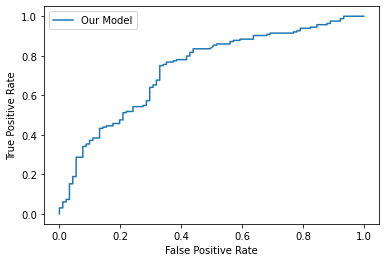

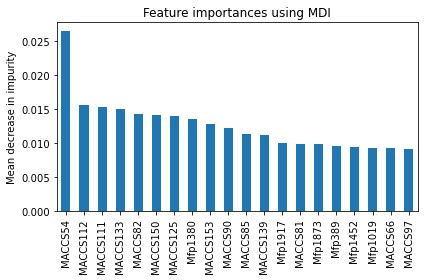

In [124]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

test_data_heldouttest["mfp_maccs_preds"] = y_pred
test_data_heldouttest["mfp_maccs_proba"] = y_proba

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

print(Sensitivity)
print(Specificity)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

roc_auc_score 0.734186545162155


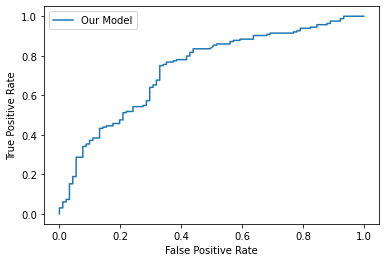

In [125]:
print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    

In [126]:
df = pd.DataFrame()
df["fpr"]=best_model_fpr
df["tpr"]=best_model_tpr
#tpr is sensitivity
df["thresholds"]=np.round(_, 8)

In [127]:
df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.927840
1,0.000000,0.006098,0.927840
2,0.000000,0.030488,0.893279
3,0.010989,0.030488,0.886701
4,0.010989,0.060976,0.876884
...,...,...,...
100,0.923077,0.975610,0.394382
101,0.923077,0.987805,0.390646
102,0.934066,0.987805,0.341505
103,0.934066,1.000000,0.301762


In [128]:
df_analyse = test_data_heldouttest[["smiles_r","TOXICITY","Source_rank","Source","Data", "all_features_preds", "all_features_proba", "mfp_maccs_preds", "mfp_maccs_proba"]]
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba,mfp_maccs_preds,mfp_maccs_proba
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,0.381605,0,0.429759
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,0,0.438883,0,0.542828
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,1,0.914594,1,0.872947
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,1,0.810263,0,0.630542
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,1,0.779076,0,0.583817
...,...,...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,0,0.363069,0,0.341505
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,1,0.826664,1,0.806488
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,0,0.585705,1,0.679714
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,1,0.875133,1,0.842744


In [129]:
P=[]
N=[]
TP=[]
FP=[]
TN=[]
FN=[]

for threshold in df["thresholds"].to_list():

    P.append(len(df_analyse[df_analyse["mfp_maccs_proba"]>=threshold]))
    N.append(len(df_analyse[df_analyse["mfp_maccs_proba"]<threshold]))
    
    df_analyse_P = df_analyse[df_analyse["TOXICITY"]==1]
    TP.append(len(df_analyse_P[df_analyse_P["mfp_maccs_proba"]>=threshold]))
    FN.append(len(df_analyse_P[df_analyse_P["mfp_maccs_proba"]<threshold]))
    
    df_analyse_N = df_analyse[df_analyse["TOXICITY"]==0]
    FP.append(len(df_analyse_N[df_analyse_N["mfp_maccs_proba"]>=threshold]))
    TN.append(len(df_analyse_N[df_analyse_N["mfp_maccs_proba"]<threshold]))
                       
df["predP"] = P
df["predN"]= N
df["TP"] = TP
df["TN"]= TN
df["FP"] = FP
df["FN"]= FN

df_maccsmfp_tpr_fpr = df
df_maccsmfp_tpr_fpr["PPV"] = df_maccsmfp_tpr_fpr["TP"]/df_maccsmfp_tpr_fpr["predP"]
df_maccsmfp_tpr_fpr["LR+"] = ((df_maccsmfp_tpr_fpr["TP"])/(df_maccsmfp_tpr_fpr["TP"]+df_maccsmfp_tpr_fpr["FN"]))/((df_maccsmfp_tpr_fpr["FP"])/(df_maccsmfp_tpr_fpr["FP"]+df_maccsmfp_tpr_fpr["TN"]))
df_maccsmfp_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.927840,0,255,0,91,0,164,NaN,NaN
1,0.000000,0.006098,0.927840,1,254,1,91,0,163,1.000000,inf
2,0.000000,0.030488,0.893279,5,250,5,91,0,159,1.000000,inf
3,0.010989,0.030488,0.886701,5,250,5,91,0,159,1.000000,inf
4,0.010989,0.060976,0.876884,10,245,9,90,1,155,0.900000,4.993902
...,...,...,...,...,...,...,...,...,...,...,...
100,0.923077,0.975610,0.394382,244,11,160,7,84,4,0.655738,1.056911
101,0.923077,0.987805,0.390646,245,10,161,7,84,3,0.657143,1.063516
102,0.934066,0.987805,0.341505,246,9,162,7,84,2,0.658537,1.070122
103,0.934066,1.000000,0.301762,249,6,164,6,85,0,0.658635,1.070588


In [130]:
df_all_features_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.914594,0,255,0,91,0,164,NaN,NaN
1,0.010989,0.000000,0.914594,0,255,0,91,0,164,NaN,NaN
2,0.010989,0.048780,0.871272,9,246,8,90,1,156,0.888889,4.439024
3,0.021978,0.048780,0.868743,9,246,8,90,1,156,0.888889,4.439024
4,0.021978,0.164634,0.826664,28,227,26,89,2,138,0.928571,7.213415
...,...,...,...,...,...,...,...,...,...,...,...
100,0.923077,0.987805,0.291724,245,10,162,8,83,2,0.661224,1.083015
101,0.923077,0.993902,0.279184,247,8,163,7,84,1,0.659919,1.076728
102,0.956044,0.993902,0.265534,250,5,163,4,87,1,0.652000,1.039599
103,0.956044,1.000000,0.264297,250,5,163,4,87,1,0.652000,1.039599


In [133]:
df_maccsmfp_tpr_fpr[:15]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.927840,0,255,0,91,0,164,NaN,NaN
1,0.000000,0.006098,0.927840,1,254,1,91,0,163,1.000000,inf
2,0.000000,0.030488,0.893279,5,250,5,91,0,159,1.000000,inf
3,0.010989,0.030488,0.886701,5,250,5,91,0,159,1.000000,inf
4,0.010989,0.060976,0.876884,10,245,9,90,1,155,0.900000,4.993902
5,0.021978,0.060976,0.872947,11,244,10,90,1,154,0.909091,5.548780
6,0.021978,0.073171,0.858962,14,241,12,89,2,152,0.857143,3.329268
7,0.032967,0.073171,0.858957,14,241,12,89,2,152,0.857143,3.329268
8,0.032967,0.121951,0.828230,23,232,20,88,3,144,0.869565,3.699187
9,0.032967,0.134146,0.826486,25,230,22,88,3,142,0.880000,4.069106


<AxesSubplot:xlabel='thresholds', ylabel='LR+'>

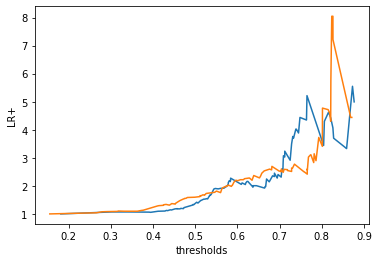

In [134]:
import seaborn as sns
sns.lineplot(data=df_maccsmfp_tpr_fpr, x="thresholds", y="LR+")
sns.lineplot(data=df_all_features_tpr_fpr, x="thresholds", y="LR+")

In [135]:
10/25

0.4

In [136]:
df_all_features_tpr_fpr[df_all_features_tpr_fpr["predP"]>=25]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
4,0.021978,0.164634,0.826664,28,227,26,89,2,138,0.928571,7.213415
5,0.021978,0.176829,0.826524,31,224,29,89,2,135,0.935484,8.045732
6,0.032967,0.176829,0.823774,31,224,29,89,2,135,0.935484,8.045732
7,0.032967,0.189024,0.821646,34,221,31,88,3,133,0.911765,5.733740
8,0.043956,0.189024,0.821254,35,220,31,87,4,133,0.885714,4.300305
...,...,...,...,...,...,...,...,...,...,...,...
100,0.923077,0.987805,0.291724,245,10,162,8,83,2,0.661224,1.083015
101,0.923077,0.993902,0.279184,247,8,163,7,84,1,0.659919,1.076728
102,0.956044,0.993902,0.265534,250,5,163,4,87,1,0.652000,1.039599
103,0.956044,1.000000,0.264297,250,5,163,4,87,1,0.652000,1.039599


In [137]:
7/89

0.07865168539325842

In [138]:
df_maccsmfp_tpr_fpr[df_maccsmfp_tpr_fpr["predP"]>=15]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
8,0.032967,0.121951,0.828230,23,232,20,88,3,144,0.869565,3.699187
9,0.032967,0.134146,0.826486,25,230,22,88,3,142,0.880000,4.069106
10,0.032967,0.152439,0.821027,27,228,24,88,3,140,0.888889,4.439024
11,0.043956,0.152439,0.816137,28,227,25,88,3,139,0.892857,4.623984
12,0.043956,0.189024,0.806284,35,220,31,87,4,133,0.885714,4.300305
...,...,...,...,...,...,...,...,...,...,...,...
100,0.923077,0.975610,0.394382,244,11,160,7,84,4,0.655738,1.056911
101,0.923077,0.987805,0.390646,245,10,161,7,84,3,0.657143,1.063516
102,0.934066,0.987805,0.341505,246,9,162,7,84,2,0.658537,1.070122
103,0.934066,1.000000,0.301762,249,6,164,6,85,0,0.658635,1.070588


In [144]:
df_analyse["mfp_earlydetections"] = df_analyse["mfp_maccs_proba"]>= 0.816137
df_analyse["allfeatures_earlydetections"] = df_analyse["all_features_proba"]>= 0.826664

/tmp/ipykernel_225052/1187689363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["mfp_earlydetections"] = df_analyse["mfp_maccs_proba"]>= 0.816137
/tmp/ipykernel_225052/1187689363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["allfeatures_earlydetections"] = df_analyse["all_features_proba"]>= 0.826664


In [145]:
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba,mfp_maccs_preds,mfp_maccs_proba,mfp_earlydetections,allfeatures_earlydetections
0,CC(C)NCC(O)c1cc(O)cc(O)c1,0,13,DILIrank dataset CP Overlap REpsilber,DILI,0,0.381605,0,0.429759,False,False
1,Clc1ccc(CSC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1,0,1,DILIst Classification Topical,DILI,0,0.438883,0,0.542828,False,False
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,0,13,DILIrank dataset CP Overlap REpsilber,DILI,1,0.914594,1,0.872947,True,True
3,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1)C(C...,1,1,DILIst Classification Oral,DILI,1,0.810263,0,0.630542,False,False
4,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,1,1,DILIst Classification Oral,DILI,1,0.779076,0,0.583817,False,False
...,...,...,...,...,...,...,...,...,...,...,...
250,NCC(O)c1ccc(O)c(O)c1,0,1,DILIst Classification Intravenous,DILI,0,0.363069,0,0.341505,False,False
251,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)C...,1,1,DILIst Classification Intravenous,DILI,1,0.826664,1,0.806488,False,False
252,COc1cc(NC(C)CCCN)c2ncccc2c1,0,1,DILIst Classification Oral,DILI,0,0.585705,1,0.679714,False,False
253,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,1,1,DILIst Classification Oral,DILI,1,0.875133,1,0.842744,True,True


In [146]:
#df_early = df_analyse[df_analyse["TOXICITY"]==1]
#df_early = df_early[df_early["mfp_earlydetections"]==False]
#df_early = df_early[df_early["allfeatures_earlydetections"]==True]
#df_early

In [147]:
#len(df_early)

In [148]:
df_analyse.to_csv("Heldout_test_predictions_earlydetection.csv", index=False)